#### Description

This code finds optimal num_competitors for the tournament selection method in the GA_2_2 GeneticAlgorithm run method.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import time

from GA_2_2 import GeneticAlgorithm

In [2]:
# Control variables
cnn_model_path = '../Models/CNN_6_1_2.keras'
masked_sequence = 'NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN'
max_length = 150
pop_size = 200
generations = 100
base_mutation_rate = 0.05
precision = 0.001

# Testing variables
run_per_experiment = 20
results = []
target_expression = 1
range_num_competitors = range(1, 20)

In [3]:
for num_competitors in range_num_competitors:
    for run_id in range(run_per_experiment):
        print(f'num_competitors: {num_competitors} | Run {run_id + 1} ', end='\r')

        ga = GeneticAlgorithm(
            cnn_model_path=cnn_model_path,
            masked_sequence=masked_sequence,
            target_expression=target_expression,
            max_length=max_length,
            pop_size=pop_size,
            generations=generations,
            base_mutation_rate=base_mutation_rate,
            precision=precision,
            chromosomes=1,
            islands=1,
            num_parents=2,
            gene_flow_rate=0,
            num_competitors=num_competitors,
            selection='tournament',
            print_progress=False,
            early_stopping=False
        )
        
        # Time the run
        start_time = time.time()
        best_sequence, best_prediction = ga.run()
        end_time = time.time()
        run_time = end_time - start_time
        
        # Record the results
        results.append({
            'num_competitors': num_competitors,
            'run_id': run_id + 1,
            'best_sequence': best_sequence,
            'error': abs(best_prediction - target_expression),
            'run_time': run_time
        })

# Convert results to a DataFrame for analysis
results_df = pd.DataFrame(results)

Instructions for updating:
Use tf.identity with explicit device placement instead.


c:\Users\rsore\anaconda3\envs\TX_prediction\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 34 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


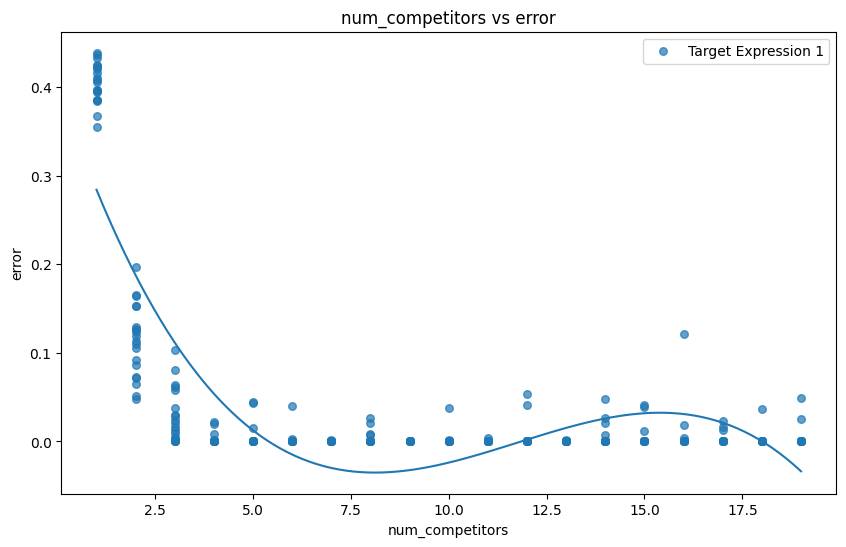

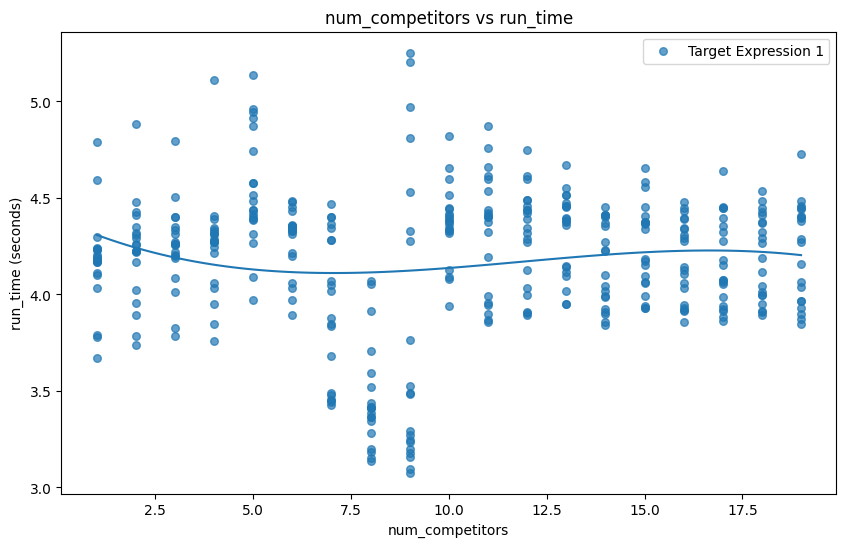

In [4]:
polynomial_degree = 3

# Scatter plot for num_competitors vs error
plt.figure(figsize=(10, 6))
plt.scatter(results_df['num_competitors'], results_df['error'], label=f'Target Expression {target_expression}', s=30, alpha=0.7)
    
poly_fit = np.polyfit(results_df['num_competitors'], results_df['error'], polynomial_degree)
poly_fn = np.poly1d(poly_fit)
x_vals = np.linspace(results_df['num_competitors'].min(), results_df['num_competitors'].max(), 100)
plt.plot(x_vals, poly_fn(x_vals))
    

plt.title('num_competitors vs error')
plt.xlabel('num_competitors')
plt.ylabel('error')
plt.legend()
plt.show()

# Scatter plot for num_competitors vs run_time
plt.figure(figsize=(10, 6))
plt.scatter(results_df['num_competitors'], results_df['run_time'], label=f'Target Expression {target_expression}', s=30, alpha=0.7)

poly_fit = np.polyfit(results_df['num_competitors'], results_df['run_time'], polynomial_degree)
poly_fn = np.poly1d(poly_fit)
x_vals = np.linspace(results_df['num_competitors'].min(), results_df['num_competitors'].max(), 100)
plt.plot(x_vals, poly_fn(x_vals))
        

plt.title('num_competitors vs run_time')
plt.xlabel('num_competitors')
plt.ylabel('run_time (seconds)')
plt.legend()
plt.show()
